
Resultados Finais:
           3         5
42  0.740741  0.740741
17  0.648148  0.666667
24  0.740741  0.666667


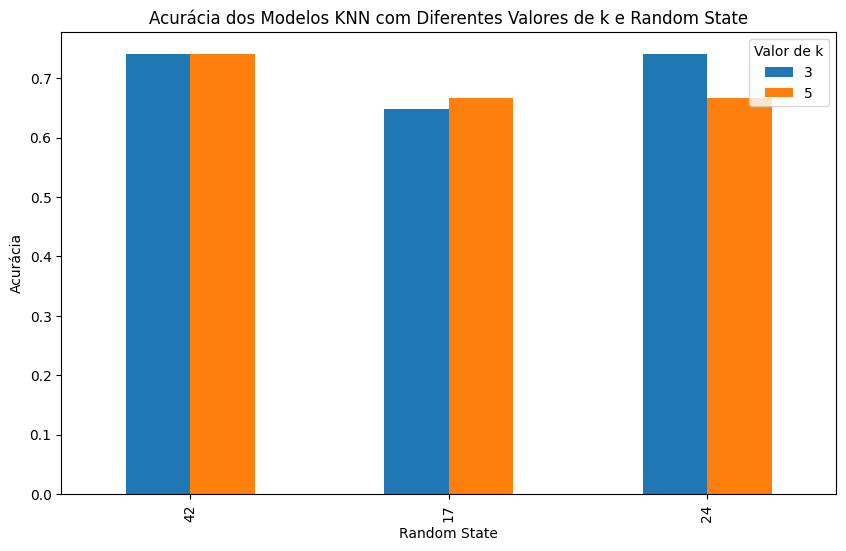


Configuração com melhor desempenho: Random State = 3, k = 42 com Acurácia de 0.7407


In [7]:
# Apresentar os resultados em um DataFrame para facilitar a visualização
resultados_df = pd.DataFrame(resultados).T
print("\nResultados Finais:")
print(resultados_df)

# Análise visual com gráfico de barras
resultados_df.plot(kind='bar', figsize=(10, 6))
plt.title('Acurácia dos Modelos KNN com Diferentes Valores de k e Random State')
plt.xlabel('Random State')
plt.ylabel('Acurácia')
plt.legend(title='Valor de k')
plt.show()

# Identificando o melhor desempenho
melhor_random_state = resultados_df.max().idxmax()
melhor_k = resultados_df.idxmax().max()
melhor_acuracia = resultados_df.max().max()
print(f"\nConfiguração com melhor desempenho: Random State = {
      melhor_random_state}, k = {melhor_k} com Acurácia de {melhor_acuracia:.4f}")

In [6]:
# Função para repetir a análise com diferentes random_state
def avaliar_com_diferentes_random_states(random_states, k_values):
    resultados = {}
    for state in random_states:
        print(f"\nRandom State: {state}")
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.3, random_state=state)
        resultados[state] = {}
        for k in k_values:
            accuracy = treinar_e_avaliar_knn(
                k, X_train, X_test, y_train, y_test)
            resultados[state][k] = accuracy
    return resultados


# Definindo os valores de random_state e k a serem testados
random_states = [42, 17, 24]
k_values = [3, 5]

# Avaliação dos modelos
resultados = avaliar_com_diferentes_random_states(random_states, k_values)


Random State: 42
Acurácia para k = 3: 0.7407
Acurácia para k = 5: 0.7407

Random State: 17
Acurácia para k = 3: 0.6481
Acurácia para k = 5: 0.6667

Random State: 24
Acurácia para k = 3: 0.7407
Acurácia para k = 5: 0.6667


In [5]:
# Função para treinar e avaliar o KNN
def treinar_e_avaliar_knn(k, X_train, X_test, y_train, y_test):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Acurácia para k = {k}: {accuracy:.4f}")
    return accuracy


# Avaliação para k = 3 e k = 5
print("Random State: 42")
accuracy_k3 = treinar_e_avaliar_knn(3, X_train, X_test, y_train, y_test)
accuracy_k5 = treinar_e_avaliar_knn(5, X_train, X_test, y_train, y_test)

Random State: 42
Acurácia para k = 3: 0.7407
Acurácia para k = 5: 0.7407


In [4]:
# Separar variáveis independentes (X) e variável dependente (y)
X = vinhos.drop('classe', axis=1)
y = vinhos['classe']

# Dividir o conjunto de dados
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

In [ ]:
# URL do dataset Wine
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'

# Nome das colunas em português BR
column_names_pt_br = [
    'classe', 'alcool', 'acido_malico', 'cinzas', 'alcalinidade_de_cinzas',
    'magnesio', 'fenois_totais', 'flavanoides', 'fenois_nao_flavanoides',
    'proantocianinas', 'intensidade_de_cor', 'matiz',
    'od280_od315_de_vinhos_diluidos', 'prolina'
]

# Carregar dados e definir a coluna 'classe' como categórica
vinhos = pd.read_csv(url, names=column_names_pt_br, dtype={'classe': 'object'})

# Verificar as primeiras linhas do dataset
vinhos.head()

,classe,alcool,acido_malico,cinzas,alcalinidade_de_cinzas,magnesio,fenois_totais,flavanoides,fenois_nao_flavanoides,proantocianinas,intensidade_de_cor,matiz,od280_od315_de_vinhos_diluidos,prolina
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [2]:
# Importando bibliotecas
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns